Per BCo, following this: https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_label.html

In [2]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
%matplotlib inline

In [3]:
path =  r'C:\Users\604572\Desktop\Sea Lion Counting\results\bbox_chips\adult_females\41_adult_females_1.png'

In [4]:
original_image = cv2.imread(r'C:\Users\604572\Desktop\Sea Lion Counting\results\bbox_chips\adult_females\41_adult_females_1.png')

In [5]:
blurred_image = cv2.GaussianBlur(original_image,(7,7),0)
gray_blurred = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)

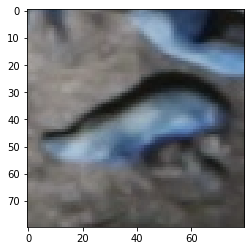

In [6]:
plt.imshow(original_image)

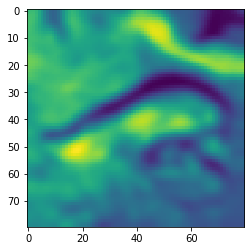

In [7]:
plt.imshow(gray_blurred)

In [8]:
# apply threshold
thresh = threshold_otsu(gray_blurred)
bw = closing(gray_blurred>thresh)      #bw.shape = 80,80,3

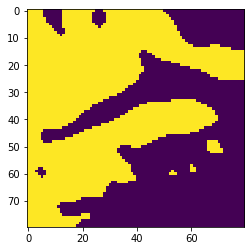

In [9]:
plt.imshow(bw)

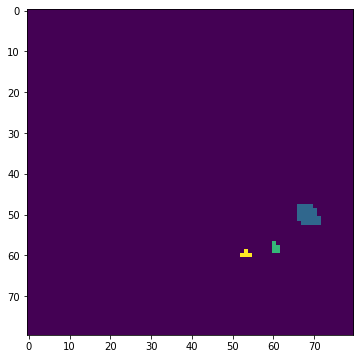

In [11]:
# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
label_image.shape
image_label_overlay = label2rgb(label_image, image=original_image)
#image_label_overlay.shape
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(label_image)#image_label_overlay)

In [12]:
for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

In [13]:
def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
 
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)
 
	# return the edged image
	return edged

In [14]:
auto_canny(original_image)

array([[  0, 255,   0, ..., 255, 255,   0],
       [255, 255, 255, ...,   0, 255, 255],
       [255,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

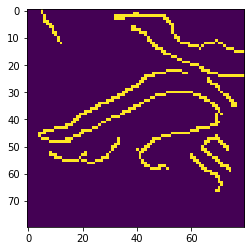

In [15]:
plt.imshow(auto_canny(gray_blurred))

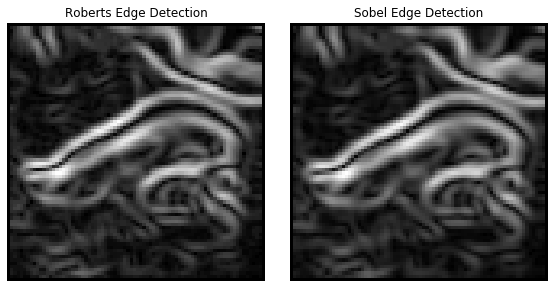

In [33]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import camera
from skimage.filters import roberts, sobel, sobel_h, sobel_v, scharr, \
    scharr_h, scharr_v, prewitt, prewitt_v, prewitt_h

image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
image = cv2.GaussianBlur(image,(5,5),0,0)
edge_roberts = roberts(image)
edge_sobel = sobel(image)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(8, 4))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

#ax[2].imshow()

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

Now from here: https://scikit-image.org/docs/dev/user_guide/tutorial_segmentation.html

(80, 80)


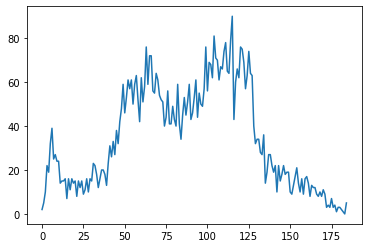

In [17]:
from skimage import data
from skimage.exposure import histogram
original_image = cv2.imread(r'C:\Users\604572\Desktop\Sea Lion Counting\results\bbox_chips\adult_females\41_adult_females_1.png')
original_2d = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
print(original_2d.shape)
hist, hist_centers = histogram(original_2d)
plt.plot(hist)

In [18]:
from skimage.feature import canny
edges = canny(original_2d/255.)

In [19]:
from scipy import ndimage as ndi
fill_image = ndi.binary_fill_holes(edges)

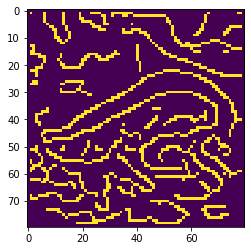

In [20]:
plt.imshow(fill_image)

In [21]:
from skimage.filters import sobel
elevation_map = sobel(original_2d)

In [22]:
markers = np.zeros_like(original_2d)
markers[original_2d < 100] = 1
markers[original_2d > 125] = 2

In [23]:
markers.shape

(80, 80)

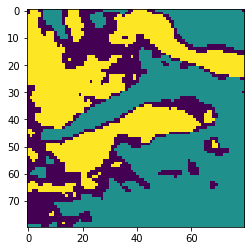

In [24]:
plt.imshow(markers)

In [25]:
from skimage.morphology import watershed
segmentation = watershed(elevation_map, markers)

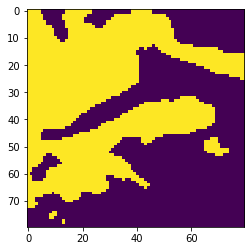

In [26]:
plt.imshow(segmentation)

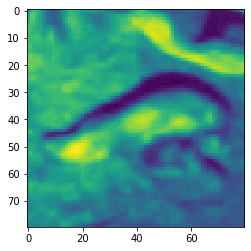

In [27]:
gray_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
plt.imshow(gray_img)

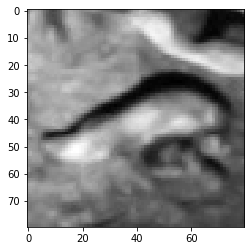

In [28]:
plt.imshow(gray_img,cmap=plt.cm.gray)